In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
y_train[0][0]

6

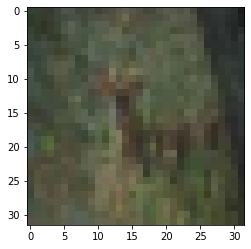

In [4]:
plt.imshow(x_train[10])

In [5]:
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
print(class_names[y_train[0][0]])

frog


In [7]:
y_train[0]

array([6], dtype=uint8)

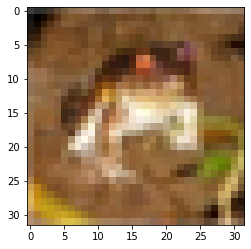

In [8]:
plt.imshow(x_train[0],cmap='gray')

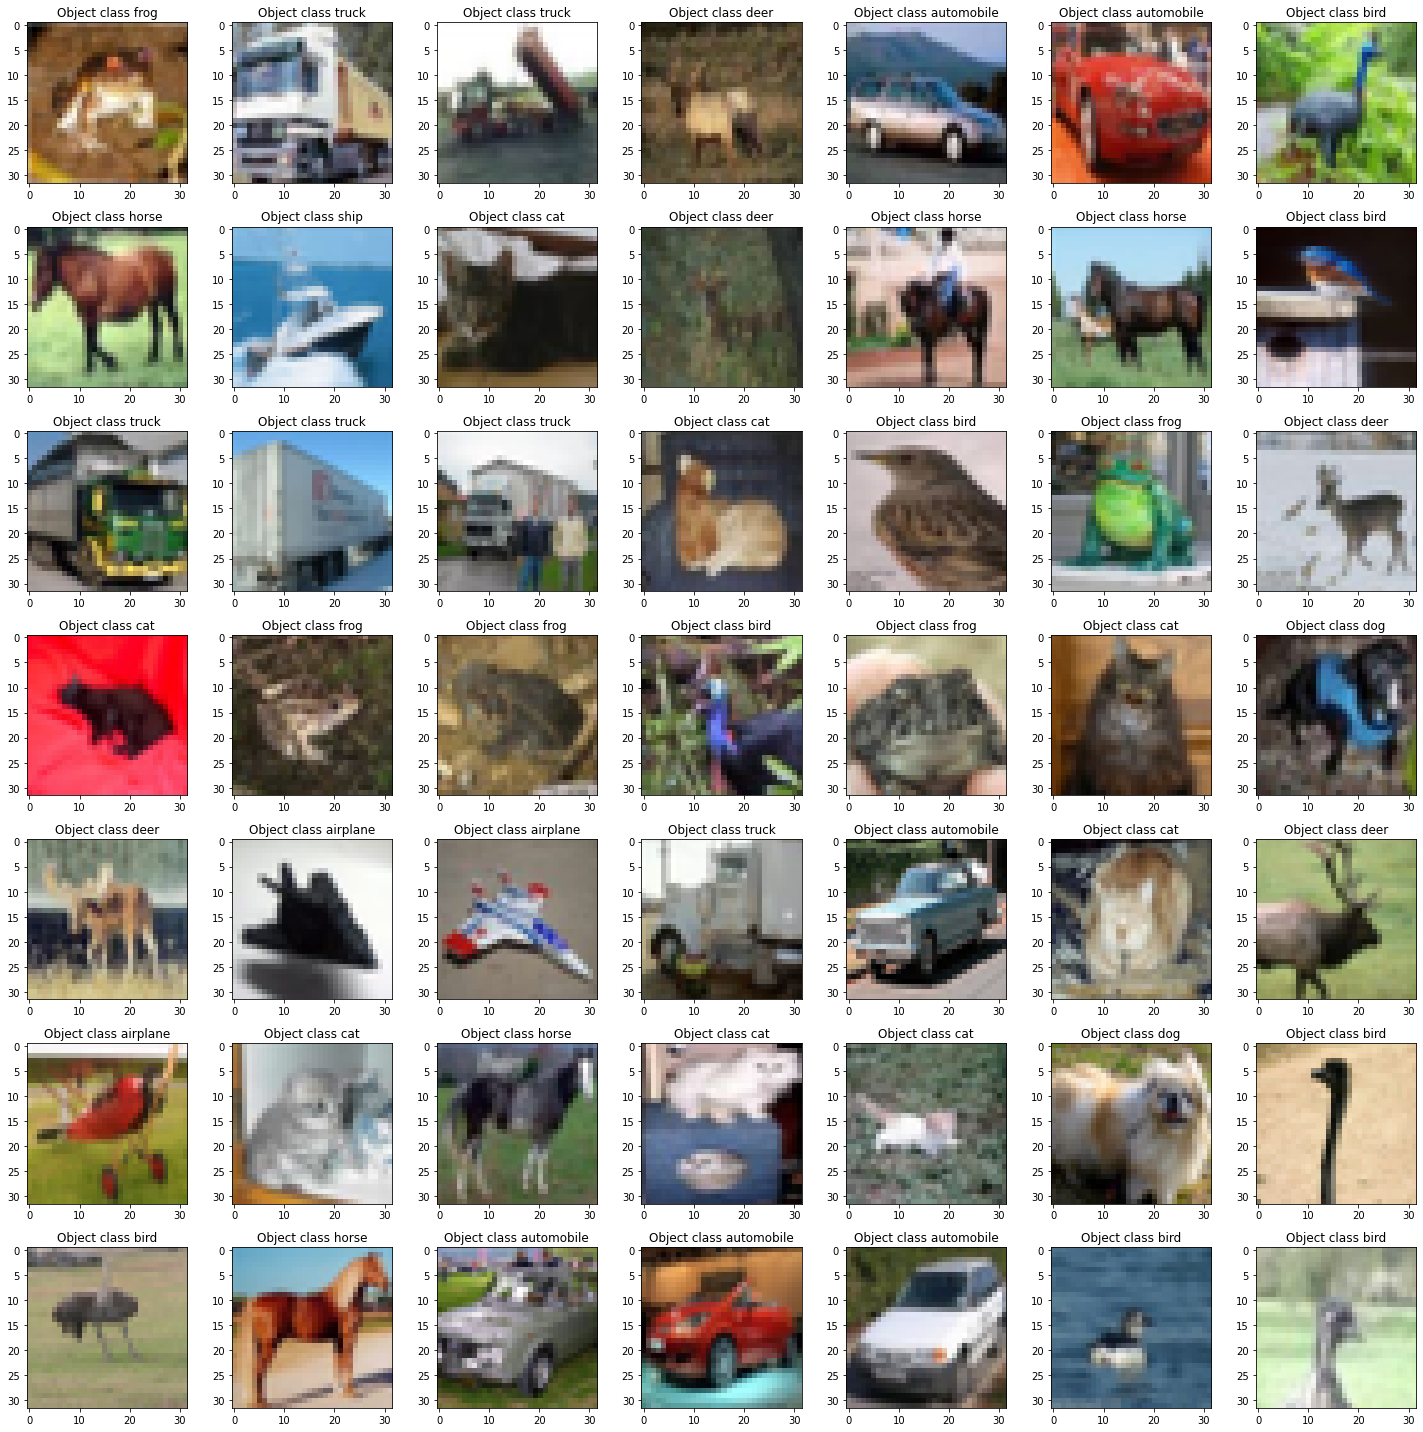

In [9]:
L=7
W=7
fig,axes = plt.subplots(L,W,figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(x_train[i])
  axes[i].set_title(f'Object class {class_names[y_train[i][0]]}')

plt.tight_layout()
plt.show()  

In [10]:
input = tf.keras.Input(shape = (32,32,3))
#yaha pr ye bta do ki kis shape pr input lene wale ho
c1 = tf.keras.layers.Conv2D(6,(5,5),activation ='tanh')(input)
s2 = tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides = None,padding ='valid')(c1)
a = tf.keras.layers.Activation(tf.keras.activations.tanh)(s2)

c3 = tf.keras.layers.Conv2D(16,(5,5),activation ='tanh')(a)
s4 = tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides = None,padding ='valid')(c3)
a = tf.keras.layers.Activation(tf.keras.activations.tanh)(s4)

c5 = tf.keras.layers.Conv2D(120,(5,5),activation ='tanh')(a)

f = tf.keras.layers.Flatten()(c5)

d1 = tf.keras.layers.Dense(84,activation = 'tanh')(f)
output = tf.keras.layers.Dense(10,activation='softmax')(d1)



In [11]:
model=tf.keras.Model(inputs = input,outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                 

In [12]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [21]:
history = model.fit(x_train,y_train,batch_size=32*4,epochs=300).history

Epoch 1/300
391/391 [==============================] - 2s 4ms/step - loss: 0.1611 - accuracy: 0.9481
Epoch 2/300
391/391 [==============================] - 2s 4ms/step - loss: 0.1973 - accuracy: 0.9312
Epoch 3/300
391/391 [==============================] - 2s 4ms/step - loss: 0.1668 - accuracy: 0.9441
Epoch 4/300
391/391 [==============================] - 2s 4ms/step - loss: 0.1406 - accuracy: 0.9541
Epoch 5/300
391/391 [==============================] - 2s 4ms/step - loss: 0.1561 - accuracy: 0.9480
Epoch 6/300
391/391 [==============================] - 2s 4ms/step - loss: 0.1797 - accuracy: 0.9394
Epoch 7/300
391/391 [==============================] - 2s 4ms/step - loss: 0.1403 - accuracy: 0.9531
Epoch 8/300
391/391 [==============================] - 2s 4ms/step - loss: 0.1731 - accuracy: 0.9408
Epoch 9/300
391/391 [==============================] - 2s 4ms/step - loss: 0.2010 - accuracy: 0.9288
Epoch 10/300
391/391 [==============================] - 2s 4ms/step - loss: 0.1418 - accura

In [22]:
model.save('model')
! tar -cf ./model.tar ./model

INFO:tensorflow:Assets written to: model/assets


In [23]:
pred = model.predict(x_test)

In [24]:
pred = np.argmax(pred,axis=1)

In [25]:
pred.shape

(10000,)

In [26]:
x_test.shape

(10000, 32, 32, 3)

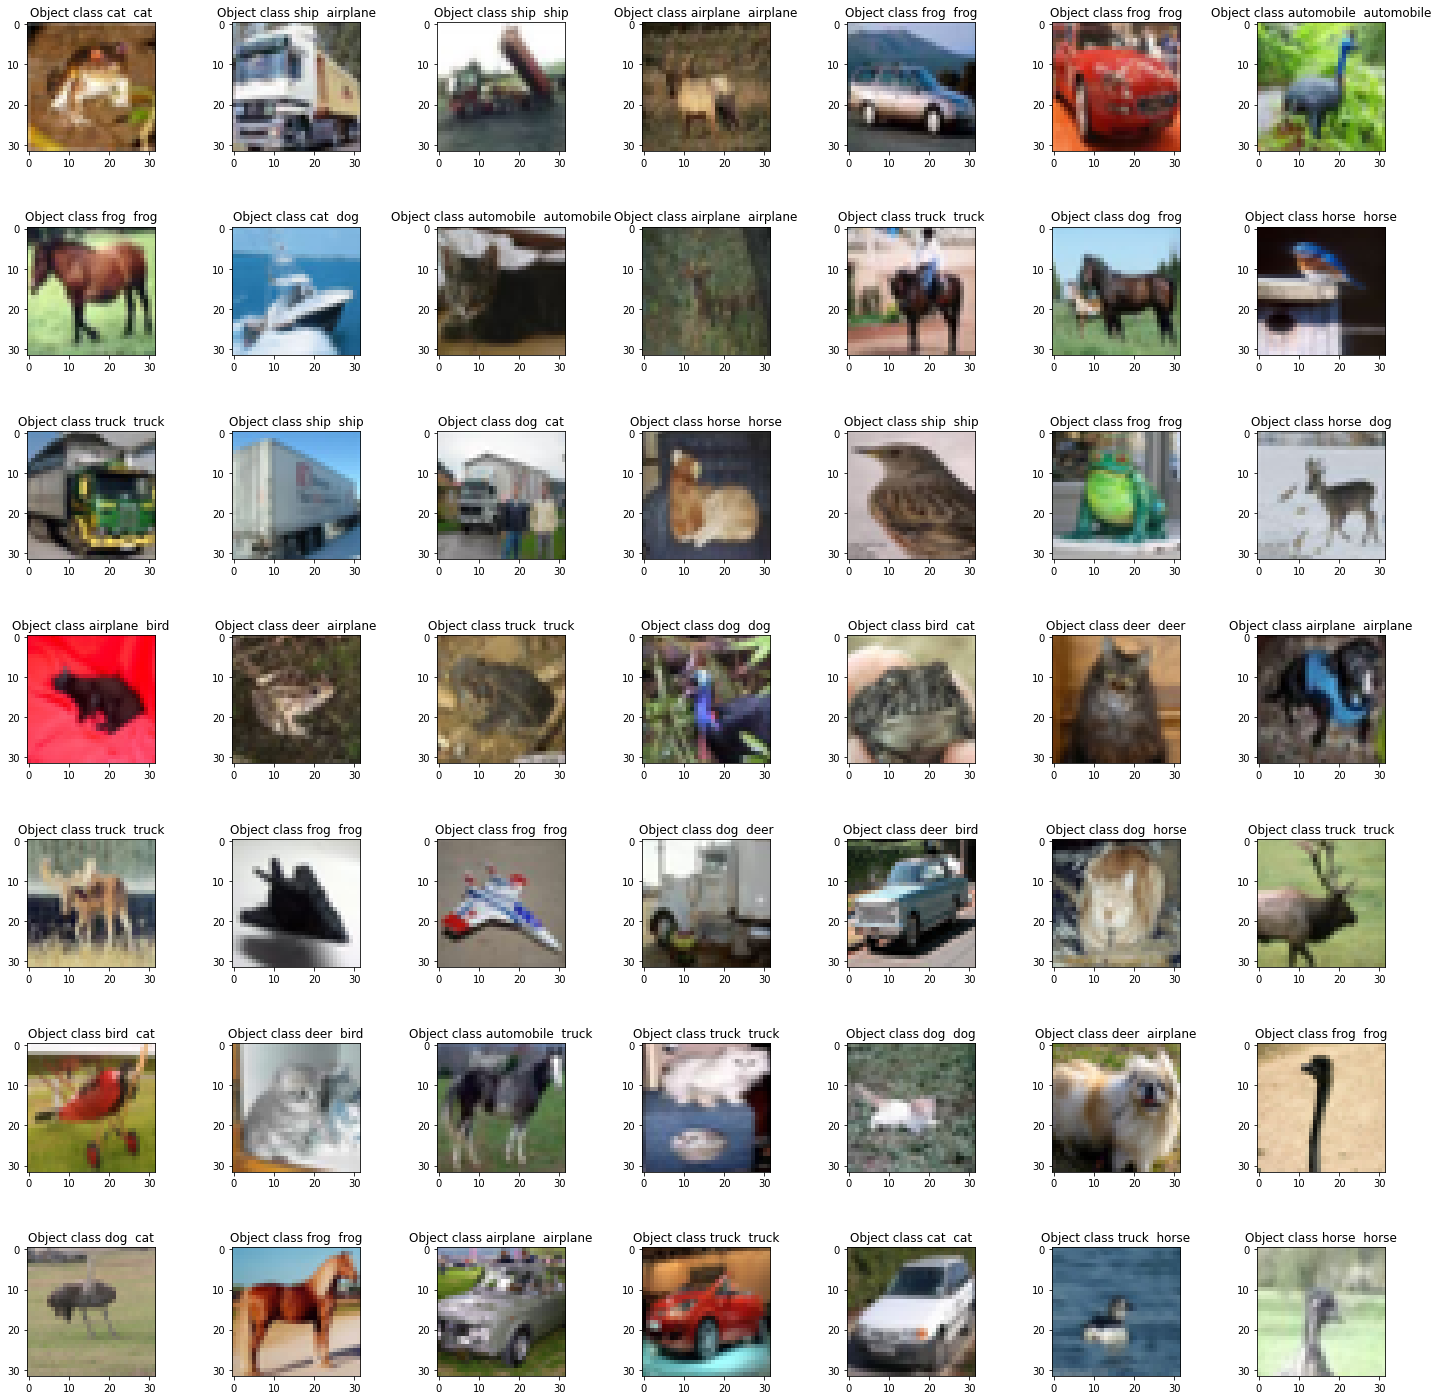

In [27]:
L=7
W=7
fig,axes = plt.subplots(L,W,figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0,L*W):
  axes[i].imshow(x_train[i])
  axes[i].set_title(f'Object class {class_names[y_test[i][0]]}  {class_names[pred[i]]}')

plt.tight_layout()
plt.show()  